In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("logs/result_mnist_varying_epochs", sep=", ", index_col=False)

/tmp/ipykernel_4108385/3086854929.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("logs/result_mnist_varying_epochs", sep=", ", index_col=False)


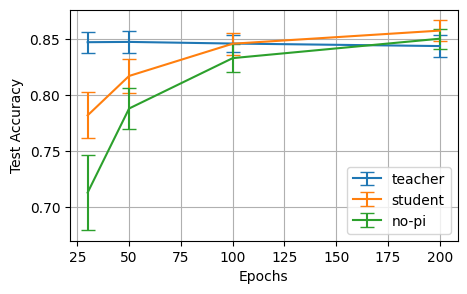

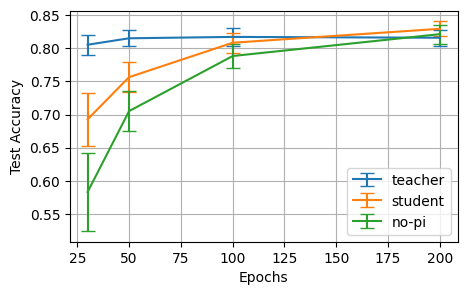

In [3]:
df = df[~df["epochs"].isin([300, 400])]

def plot_data(df, sample_size):
    subset = df[df['sample_size'] == sample_size]
    grouped = subset.groupby('epochs').agg(['mean', 'std'])
    
    plt.figure(figsize=(5, 3))
    epochs = grouped.index
    
    for column in ['teacher', 'student', 'no-pi']:
        means = grouped[column]['mean']
        stds = grouped[column]['std']
        plt.errorbar(epochs, means, yerr=stds, label=column, capsize=5)
    
    # plt.title(f'MNIST downscaled to 25%, training size: {sample_size}')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.grid(True)
    #plt.savefig(f'data/plot_sample_size_{sample_size}.pdf', bbox_inches='tight')
    plt.plot()

plot_data(df, 500)
plot_data(df, 300)